In [1]:
import os,sys
import numpy as np
import pandas as pd
import collections
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
import seaborn as sns
from adjustText import adjust_text

plt.rcParams.update(plt.rcParamsDefault)
rc={"axes.labelsize": 16, "xtick.labelsize": 12, "ytick.labelsize": 12,
    "figure.titleweight":"bold", #"font.size":14,
    "figure.figsize":(5.5,4.2), "font.weight":"regular", "legend.fontsize":10,
    'axes.labelpad':8, 'figure.dpi':300}
plt.rcParams.update(**rc)





## expression GSEA plot




In [2]:
## read fgsea result for plusCL vs minusCL
shNT_plusCL_vs_minusCL_fgsea_res = pd.read_csv('./diffexp_repCorrect/_shNT_plusCL_vs_minusCL_fgseaRes.tsv', sep = '\t')



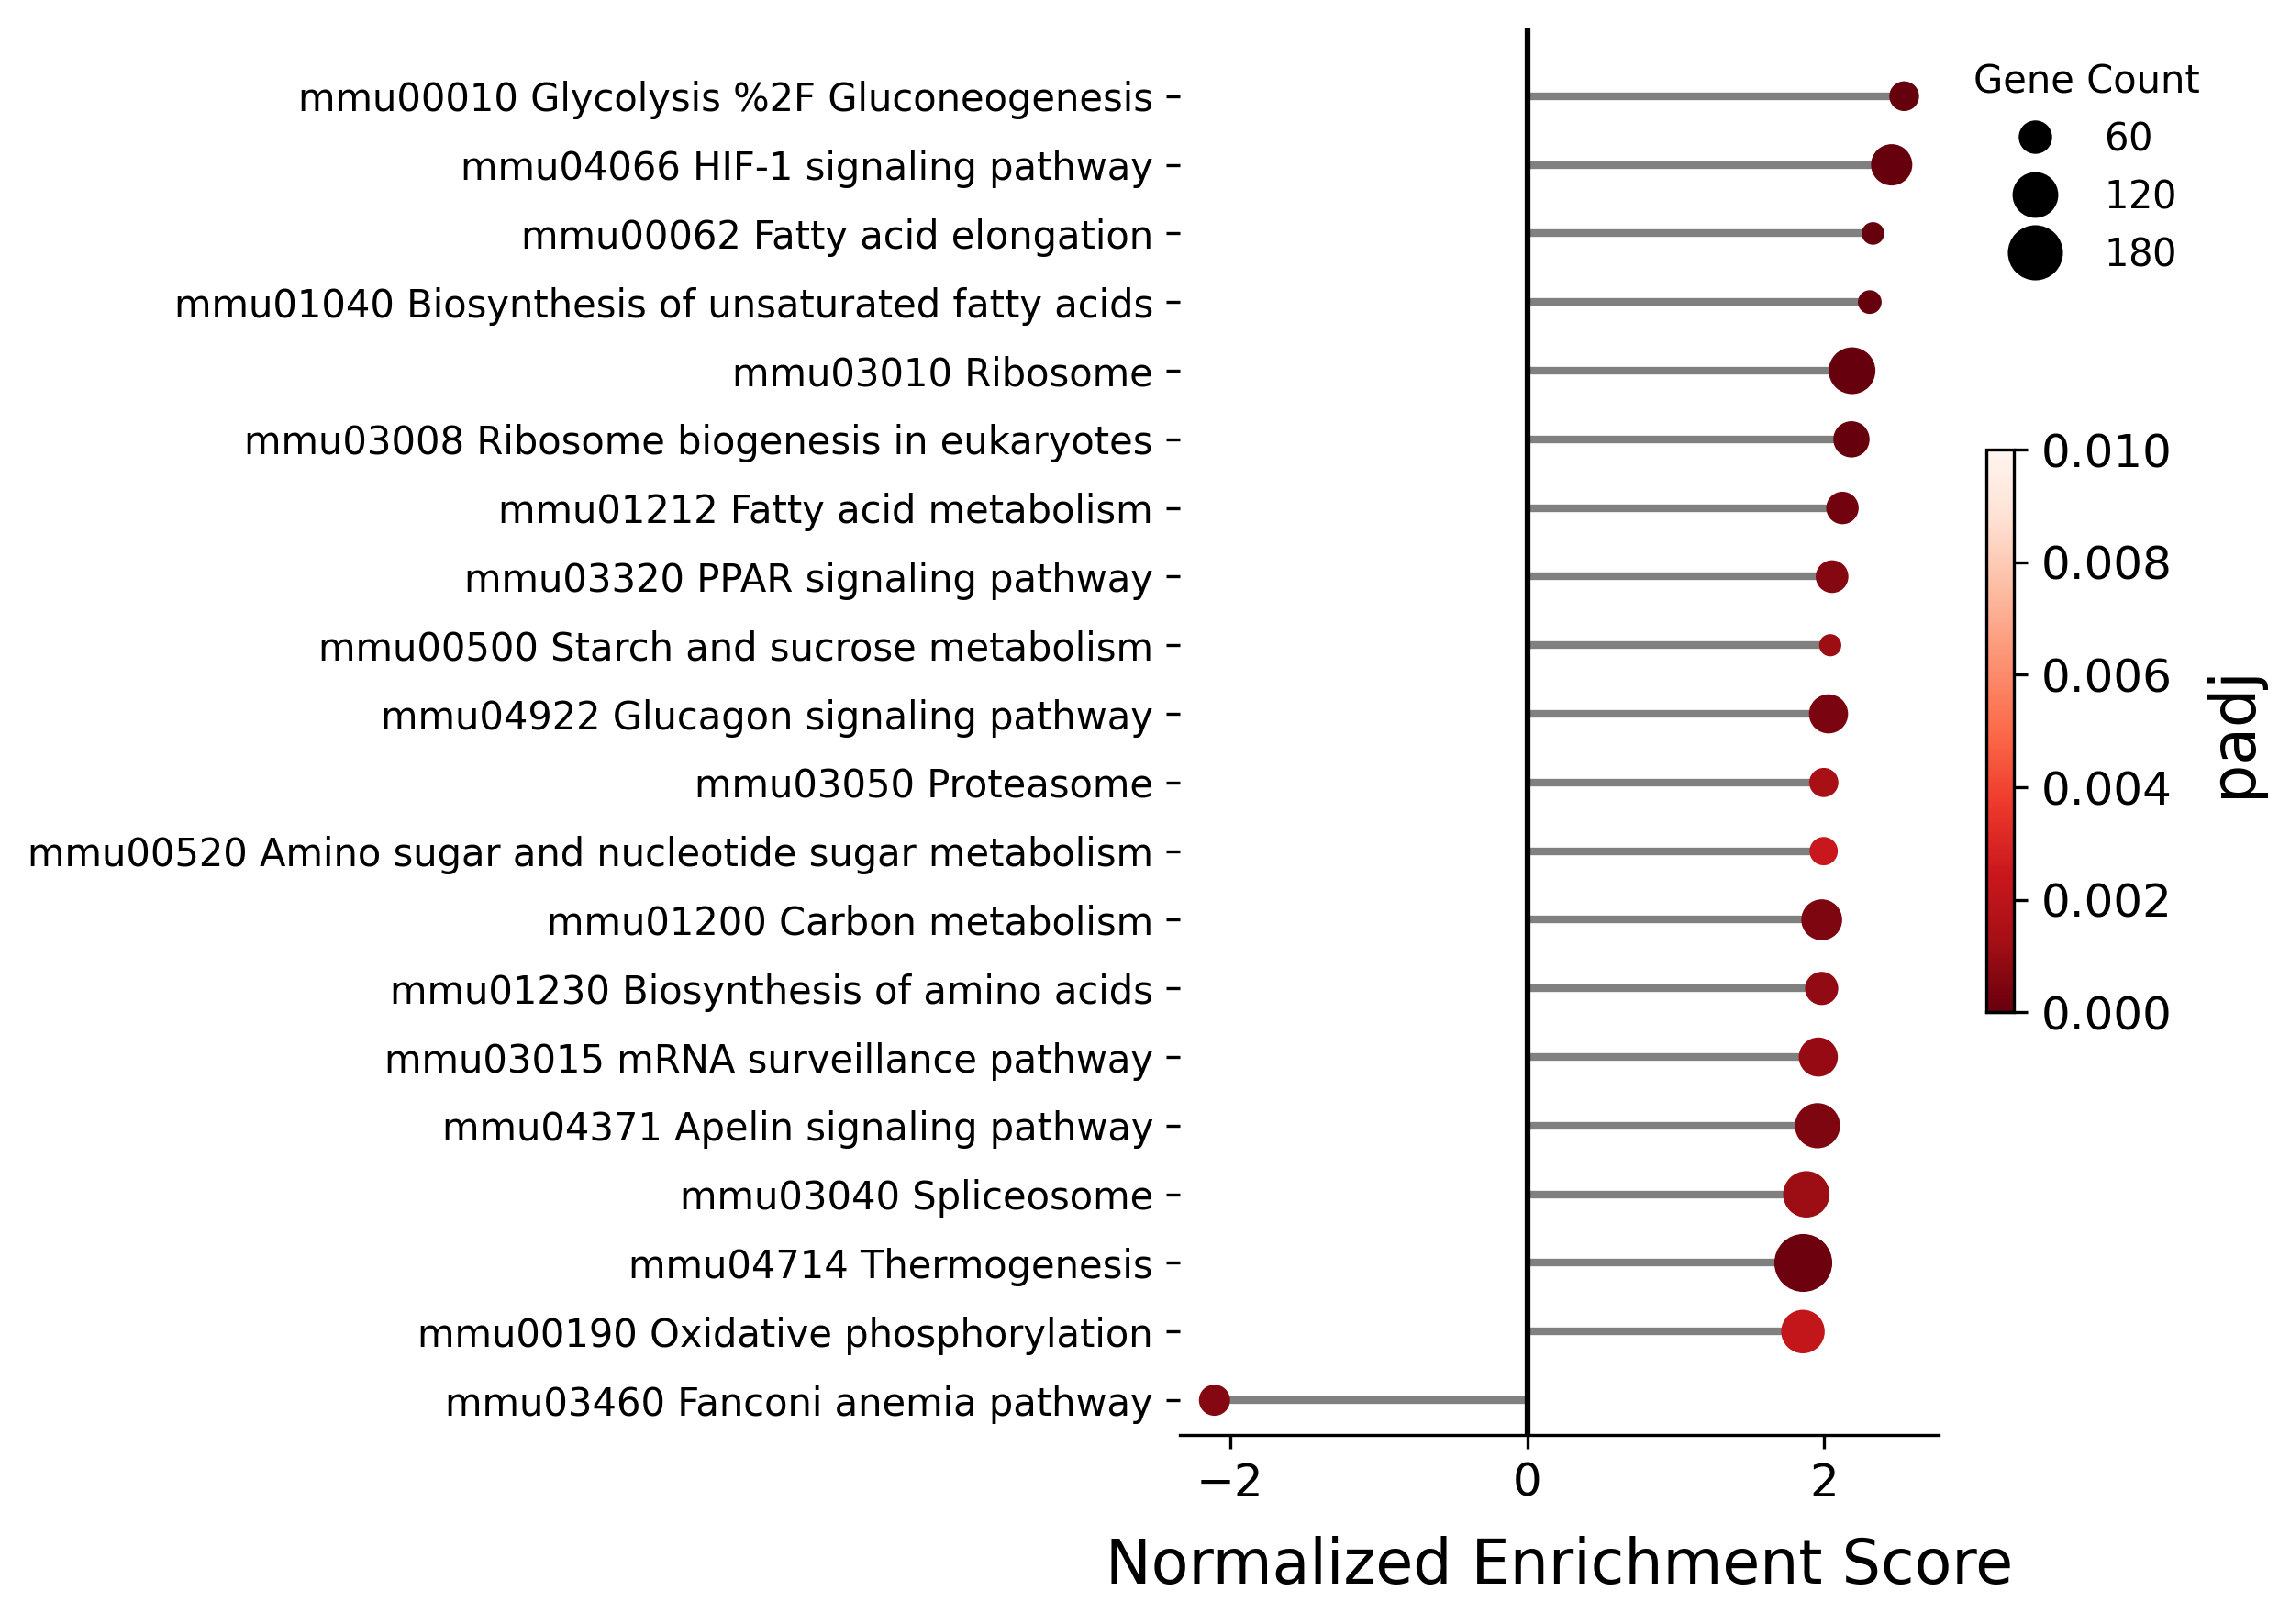

In [3]:
## dot plot to show top pathways
plot_df = shNT_plusCL_vs_minusCL_fgsea_res.query('padj < 0.0025').sort_values('NES')
plot_df['-log10padj'] = -np.log10(plot_df['padj'])

colormap = plt.cm.Reds_r #or any other colormap
normalize = mpl.colors.Normalize(vmin=0, vmax=0.01)
fig, ax = plt.subplots(figsize = (8, 6))
for i in range(plot_df.shape[0]):
    ax.hlines(plot_df.iloc[i]['pathway'], 0, plot_df.iloc[i]['NES'], linewidth = 2, color = 'grey')
sp = ax.scatter(plot_df['NES'], range(plot_df.shape[0]), s = plot_df['size'],
               c = plot_df['padj'], cmap = colormap, norm=normalize, zorder = 100)
ax.set_ylim(-0.5, plot_df.shape[0])
ax.vlines(0, *ax.get_ylim(), color = 'black')
plt.legend(*sp.legend_elements("sizes", num=3), title = 'Gene Count',
          loc = 'center left', bbox_to_anchor=(1, 0.9), frameon = False)
ax.set(xlabel = 'Normalized Enrichment Score')
ax.tick_params(axis = 'y', labelsize = 10)
plt.colorbar(sp, shrink = .4, label = 'padj')
sns.despine(trim = False, left = True)
plt.tight_layout()
fig.savefig('plusCL_vs_minusCL_fgsea_top.pdf')
plt.show()
plt.close()


In [4]:
## read fgsea result for KD vs shNT plusCL 

plusCL_KD_vs_shNT_fgsea_res = pd.read_csv('./diffexp_repCorrect/_plusCL_KD_vs_shNT_fgseaRes.tsv', sep = '\t')


In [5]:
comp_pathway = ['mmu00010 Glycolysis %2F Gluconeogenesis',
               'mmu01212 Fatty acid metabolism',
               'mmu04714 Thermogenesis',
               'mmu01200 Carbon metabolism',
               'mmu03320 PPAR signaling pathway',
               'mmu01230 Biosynthesis of amino acids',
               'mmu00500 Starch and sucrose metabolism',
               'mmu00190 Oxidative phosphorylation']



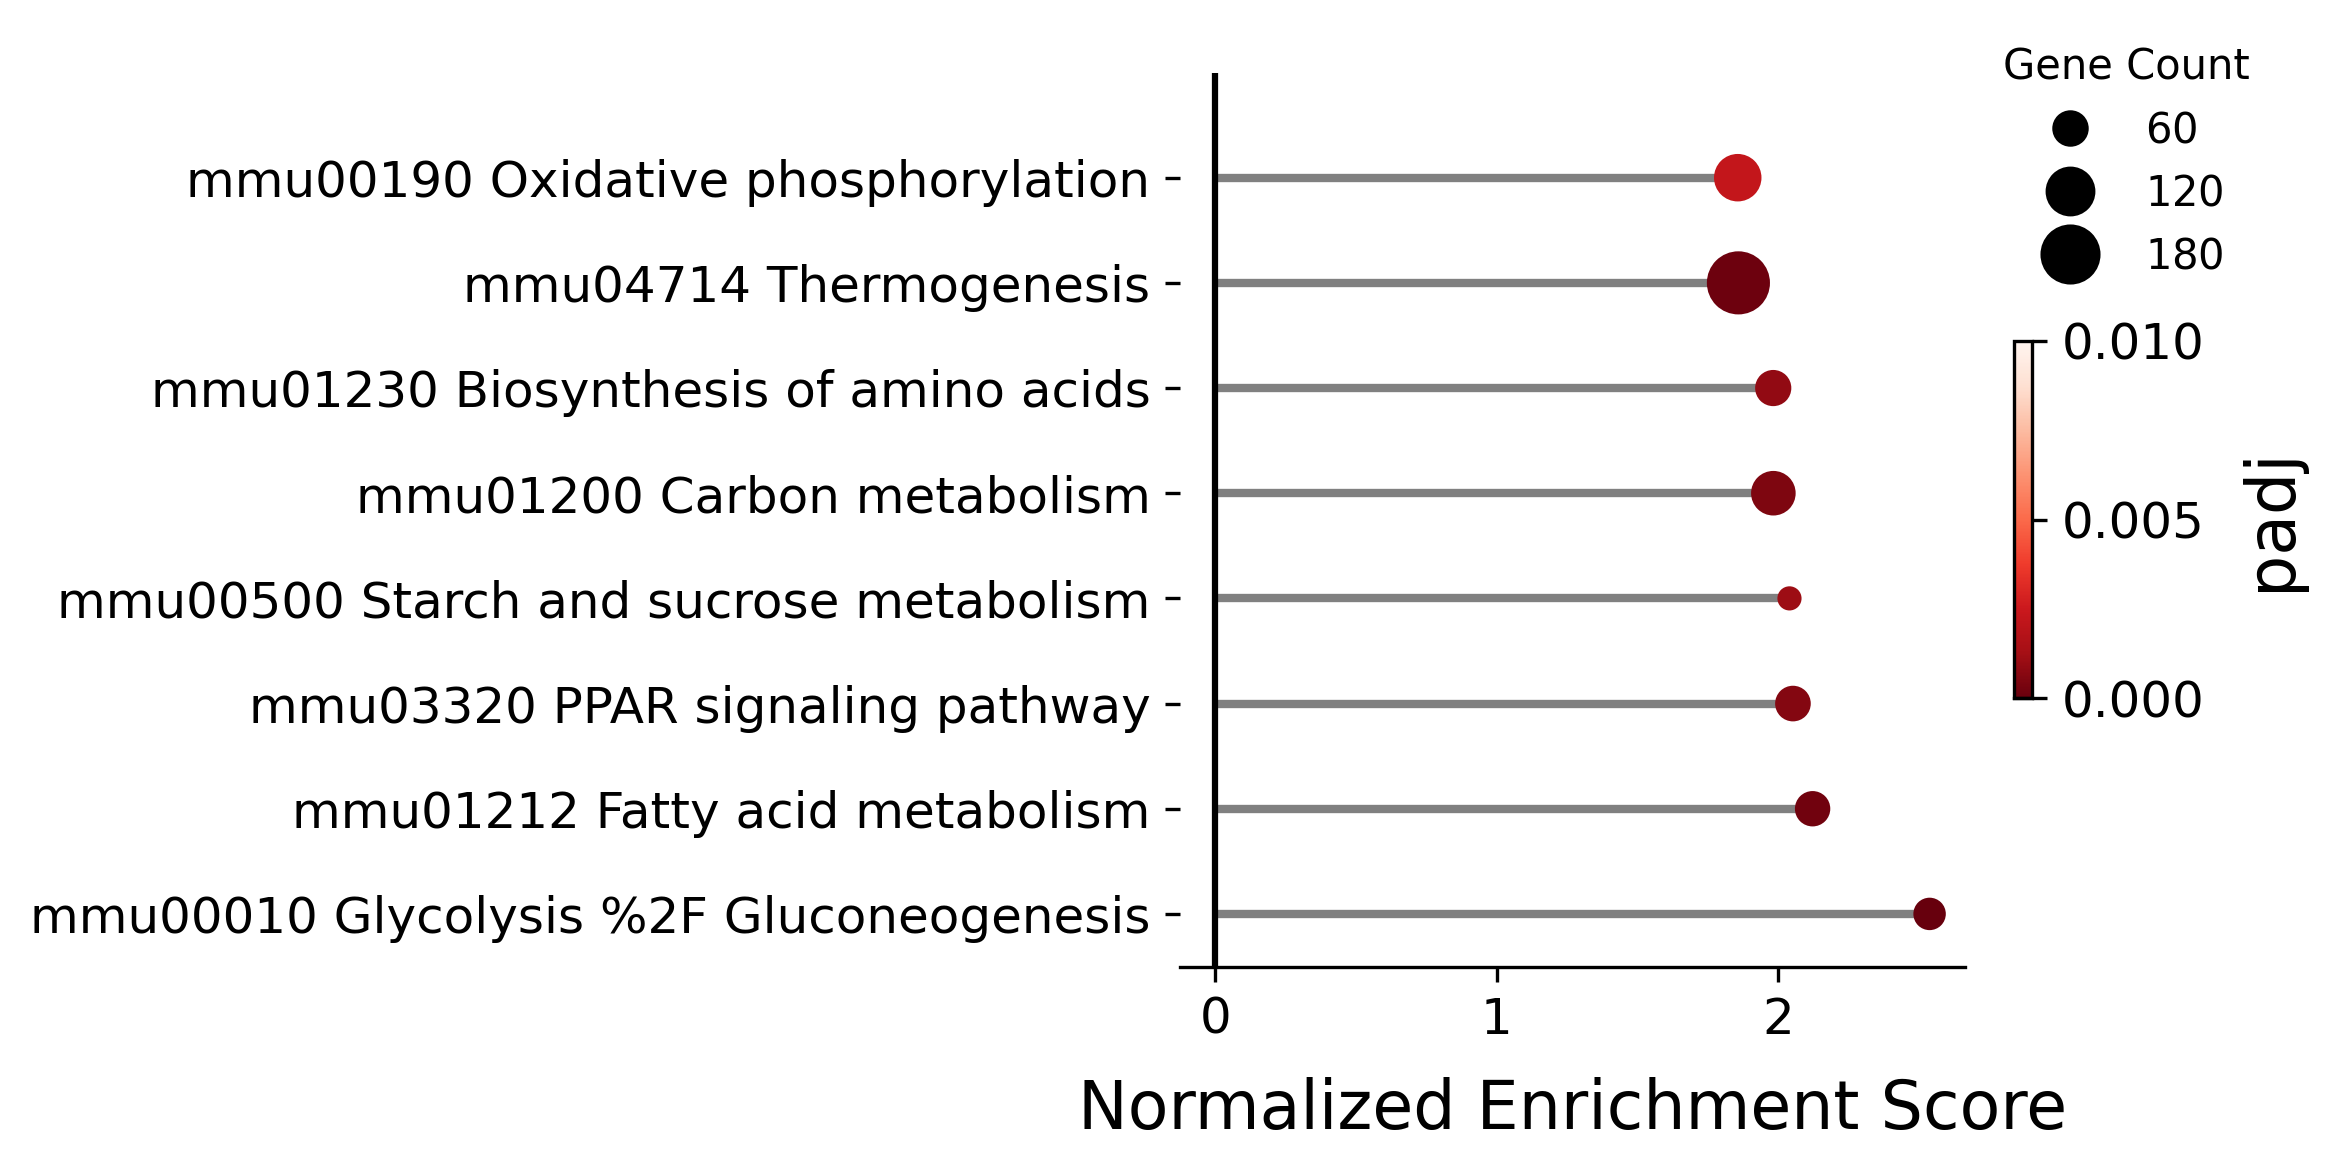

In [195]:
pplot_df1 = shNT_plusCL_vs_minusCL_fgsea_res[shNT_plusCL_vs_minusCL_fgsea_res['pathway'].isin(comp_pathway)]

colormap = plt.cm.Reds_r #or any other colormap
normalize = mpl.colors.Normalize(vmin=0, vmax=0.01)
fig, ax = plt.subplots(figsize = (7.5, 4))
for i in range(pplot_df1.shape[0]):
    ax.hlines(pplot_df1.iloc[i]['pathway'], 0, pplot_df1.iloc[i]['NES'], linewidth = 2, color = 'grey')
sp = ax.scatter(pplot_df1['NES'], range(pplot_df1.shape[0]), s = pplot_df1['size'],
               c = pplot_df1['padj'], cmap = colormap, norm=normalize, zorder = 100)
ax.set_ylim(-0.5, pplot_df1.shape[0])
ax.vlines(0, *ax.get_ylim(), color = 'black')
plt.legend(*sp.legend_elements("sizes", num=3), title = 'Gene Count',
          loc = 'center left', bbox_to_anchor=(1, 0.9), frameon = False)
ax.set(xlabel = 'Normalized Enrichment Score')
plt.colorbar(sp, shrink = .4, label = 'padj')
sns.despine(trim = False, left = True)
plt.tight_layout()
fig.savefig('plusCL_vs_minusCL_fgsea_top_subset.pdf')
plt.show()
plt.close()


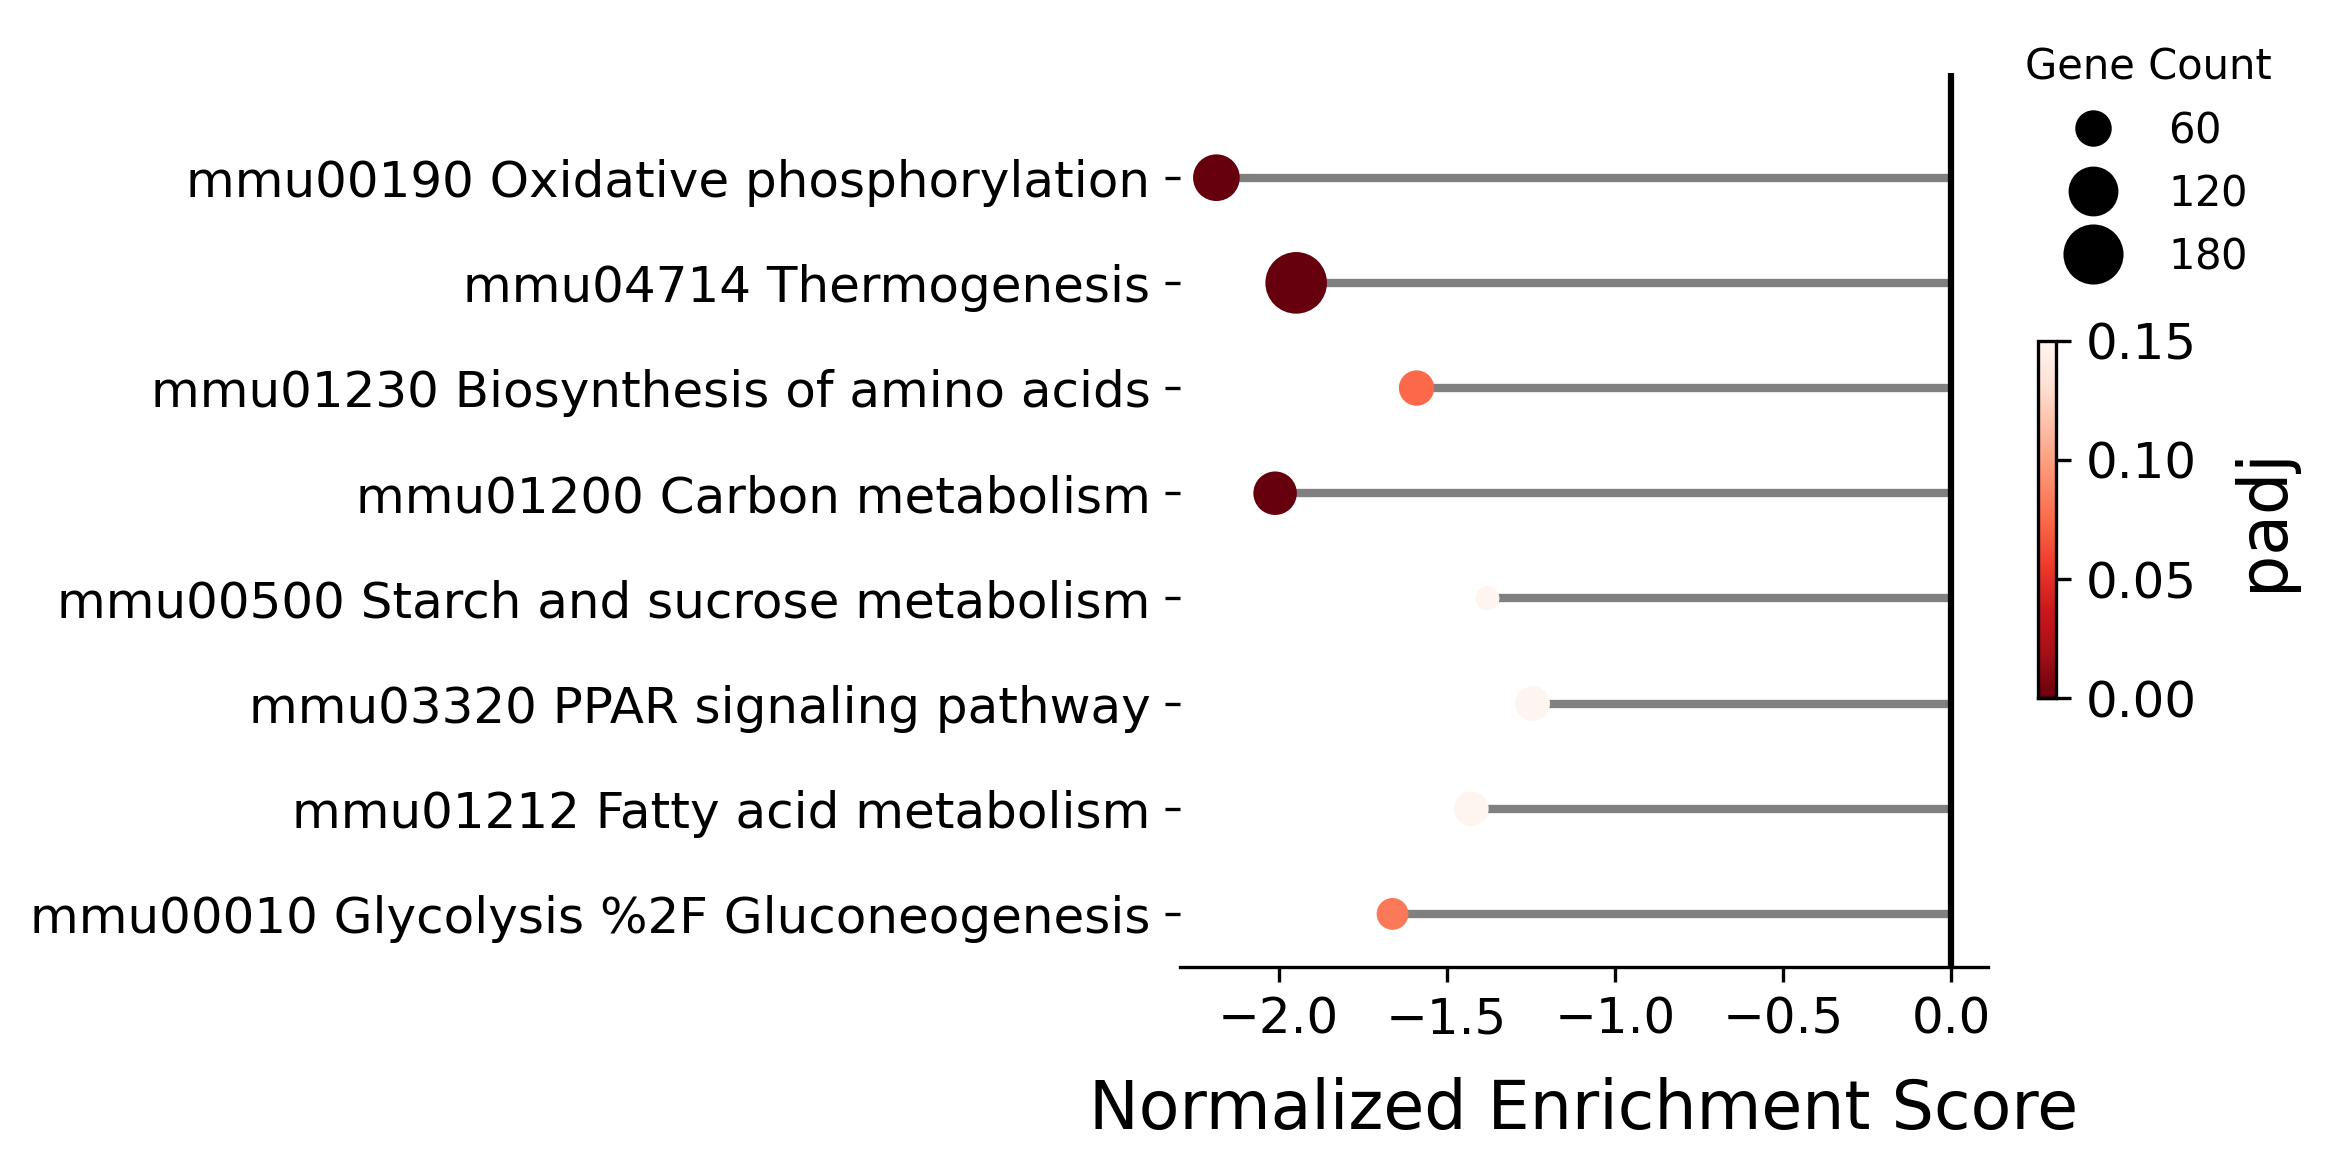

In [196]:
## dot plot to show top pathways
pplot_df2 = pd.DataFrame()
for i in pplot_df1['pathway'].tolist():
    pplot_df2 = pd.concat([pplot_df2, plusCL_KD_vs_shNT_fgsea_res[plusCL_KD_vs_shNT_fgsea_res['pathway']==i]])

colormap = plt.cm.Reds_r #or any other colormap
normalize = mpl.colors.Normalize(vmin=0, vmax=0.15)
fig, ax = plt.subplots(figsize = (7.5, 4))
for i in range(pplot_df2.shape[0]):
    ax.hlines(pplot_df2.iloc[i]['pathway'], 0, pplot_df2.iloc[i]['NES'], linewidth = 2, color = 'grey')
sp = ax.scatter(pplot_df2['NES'], range(pplot_df2.shape[0]), s = pplot_df2['size'],
               c = pplot_df2['padj'], cmap = colormap, norm=normalize, zorder = 100)
ax.set_ylim(-0.5, pplot_df2.shape[0])
ax.vlines(0, *ax.get_ylim(), color = 'black')
plt.legend(*sp.legend_elements("sizes", num=3), title = 'Gene Count',
          loc = 'center left', bbox_to_anchor=(1, 0.9), frameon = False)
ax.set(xlabel = 'Normalized Enrichment Score')
plt.colorbar(sp, shrink = .4, label = 'padj')
sns.despine(trim = False, left = True)
plt.tight_layout()
fig.savefig('plusCL_KD_vs_WT_fgsea_top_subset.pdf')
plt.show()
plt.close()
